In [ ]:
#Task 1: Perform EDA and preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#Load Telco Customer churn Dataset
df_telco = pd.read_csv("/content/Telco-Customer-Churn.csv")
#df_telco.head()
df_telco.drop(columns=["customerID"], inplace=True)
df_telco.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Inspect data
df_telco.info()
df_telco.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


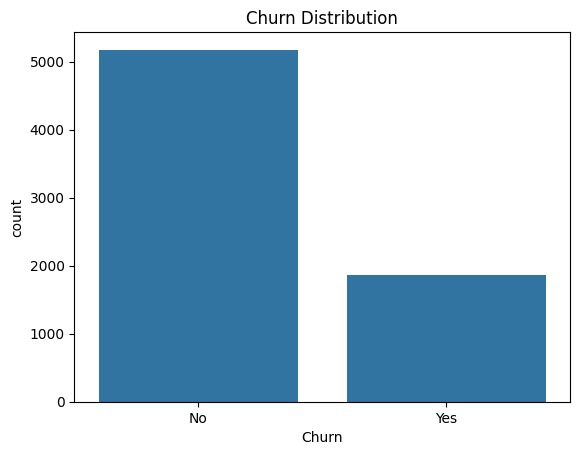

In [ ]:
#Visualize relationship
sns.countplot(x="Churn", data= df_telco)
plt.title("Churn Distribution")
plt.show()

In [ ]:
#Handle missinf data
#df_telco.fillna(df_telco.mean(),inplace=True)

#Encode categorical variables
le = LabelEncoder()
df_telco["Churn"]=  le.fit_transform(df_telco["Churn"])

#Define feautures and target
X= df_telco.drop(columns=["Churn"])
y= df_telco["Churn"]
#print(X.head())
#print(y.head())

# Select categorical columns for one-hot encoding, excluding the target variable which was already encoded
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#Scale feautures
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
#Sply dataset
X_train,  X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Train Logistic Regression model
log_model =  LogisticRegression(max_iter=200)
log_model.fit(X_train,y_train)

#plot logistic regression model


#Evaluate performance
log_pred = log_model.predict(X_test)
print("\n Logistic Regression Clasification report:")
print(classification_report(y_test, log_pred))


 Logistic Regression Clasification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
#Train K-nn model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
#Evaluate performance
knn_pred = knn_model.predict(X_test)
print("\n K-NN Clasification report:")
print(classification_report(y_test, knn_pred))



 K-NN Clasification report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.33      0.01      0.01       373

    accuracy                           0.73      1409
   macro avg       0.53      0.50      0.43      1409
weighted avg       0.63      0.73      0.63      1409



In [ ]:
#Display confuion matrix for Logistics regression
print("Confusion Matrix: \n", confusion_matrix(y_test,log_pred))

Confusion Matrix: 
 [[883 153]
 [157 216]]
